In [1]:
%matplotlib inline
import ipywidgets as wg
import matplotlib as mpl
import pandas as pd
import numpy as np
import random
import itertools
from matplotlib import colors
import matplotlib.pyplot as plt
from IPython.display import clear_output, display

# import helper functions
import voila_helper as vh

np.random.seed(42)

In [2]:
out = vh.sample_initial(n_initial=3)
out.hist(x='x', y='gamma')
# out

TypeError: 'numpy.float64' object is not iterable

In [18]:
title_html = """
<h2>Machine Learning Model Evaluation: Visual & Interactive</h2>

<ul style="line-height: 1.5">
  <li>A classifier was trained to identify positive targets, here visualized as blue marbles (upper left).
The ratio of negative (white) and positive (blue) targets can be controlled via the slider.</li>

  <li>The strength-adjustable classifier then predicts a score from one to zero for each item (upper center and right).</li>
  
  <li>Based on this score and an adjustable cutoff threshold, each item is classified as either positive or negative.
Correct or incorrect classification is highlighted with a green or red outline for each circle (lower left). 
Subsequently, 
<a href="https://en.wikipedia.org/wiki/Receiver_operating_characteristic"> the ROC curve and the AUC value<a>
(lower center) as well as
<a href="https://en.wikipedia.org/wiki/Precision_and_recall"> precision, recall</a> 
and 
<a href="https://en.wikipedia.org/wiki/Accuracy_and_precision#In_binary_classification"> accuracy </a> 
(lower right) can be calculated.</li>
</ul>
"""
# Set title widget text
header = wg.HTML(title_html)

TraitError: The 'children' trait of a VBox instance contains an Instance of a TypedTuple which expected a Widget, not the Figure <Figure size 432x288 with 1 Axes>.

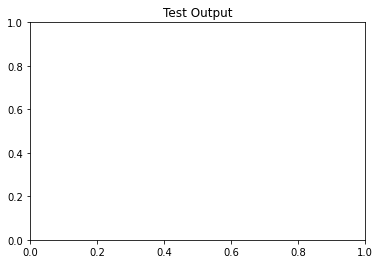

In [19]:
# Set sidebar widgets
num_init_label = wg.Label('Initial Samples n=')
num_init_slider = wg.IntSlider(min=1, max=10, step=1, value=3)
init_sample_button = wg.Button(description='Generate')
asymp_label = wg.Label('% Chance Asymptomatic')
asymp_slider = wg.FloatSlider(min=0, max=1, step=0.1, value=0.3)
sample_output = wg.Output()
def on_button_clicked(init_sample_button, sample_output):
    with sample_output:
        return vh.sample_initial(n_initial=sample_output.value,)


init_sample_button.on_click(vh.sample_initial())

inputs = [num_init_label, num_init_slider, asymp_label, asymp_slider, init_sample_button]

sidebar = wg.VBox(inputs, width='auto')

### Outputs
fig_serial = plt.figure()
fig_serial.canvas.header_visible = False
plt.title('Test Output')


### Format output as two columns
left_out = wg.VBox([fig_serial, sidebar], width='auto')
right_out = wg.VBox([fig_serial,], width='auto')
ui = wg.HBox([left_out, right_out], width='auto')
def f(l, r):
    print((l, r))

out = wg.interactive_output(f, {'l': left_out, 'r': right_out})


# ### Format Output into a Grid
# grid = wg.GridspecLayout(2,2)
# grid[0, 0] = fig_serial.canvas # placeholder for plots
# # grid[0, 1] = # placeholder for initial serial intervals
# # grid[1, 0] = num_init_slider.value 
# # grid[1, 1] = asymp_slider.value

# put all outputs into a layout grid

In [10]:
# Footer
description_html = """
<style>
p {
    margin-bottom: 1.2em;
    line-height: 1.5;
}
</style>

<p>This section is the footnotes!</p>

<p>Voila Source Code: <a href="https://github.com/dhaitz/machine-learning-interactive-visualization"></a></p>
"""
footer = wg.HTML(description_html)

In [11]:
app = wg.AppLayout(
    header=header, 
    left_sidebar=sidebar,
    center=grid,
    right_sidebar=None,
    footer=footer,
    pane_widths=[1, 3, 1],
    pane_heights=[1, 1, 1],
)

In [12]:
app

AppLayout(children=(HTML(value='\n<h2>Machine Learning Model Evaluation: Visual & Interactive</h2>\n\n<ul styl…